<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Gradient_Descent_Beginner_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Given a small dataset, our objective is to implement gradient descent to iteratively optimize the intercept term while assuming a fixed slope. We compare this with the OLS method and analyze how well gradient descent approximates the true solution.

# Business Objective

The goal is to use Gradient Descent to estimate the intercept term (b) for a simple linear regression model and compare it with the Ordinary Least Squares (OLS) approach.

# Business Constraints

1. Computational Efficiency: Since gradient descent is iterative, we must balance the number of epochs and computation time.

2. Convergence Criteria: Learning rate selection should ensure convergence while avoiding divergence or slow learning.

3. Accuracy: Gradient descent should closely approximate the OLS result for validation.

# Approach to Solution

1. Generate a synthetic dataset with make_regression().

2. Apply OLS regression to get an optimal intercept (b_ols).

3. Initialize gradient descent with an assumed slope (m = 78.35) and b=0.

4. Iterate gradient descent over multiple epochs, adjusting b using the learning rate (lr).

5. Visualize progression of b and compare it to OLS results.

6. Analyze the final b value to check how well it approximates b_ols.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
# 1. Data Generation
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

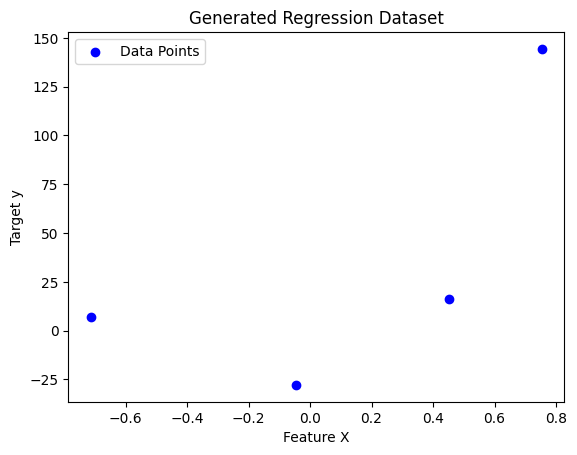

In [3]:
# Visualizing the dataset
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Generated Regression Dataset")
plt.legend()
plt.show()

In [4]:
# 2. Applying Ordinary Least Squares (OLS) using Linear Regression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [5]:
# Getting the coefficients
m_ols = reg.coef_[0]
b_ols = reg.intercept_
print(f"OLS Estimated Coefficient (m): {m_ols}")
print(f"OLS Estimated Intercept (b): {b_ols}")

OLS Estimated Coefficient (m): 78.35063667947497
OLS Estimated Intercept (b): 26.15963284313262


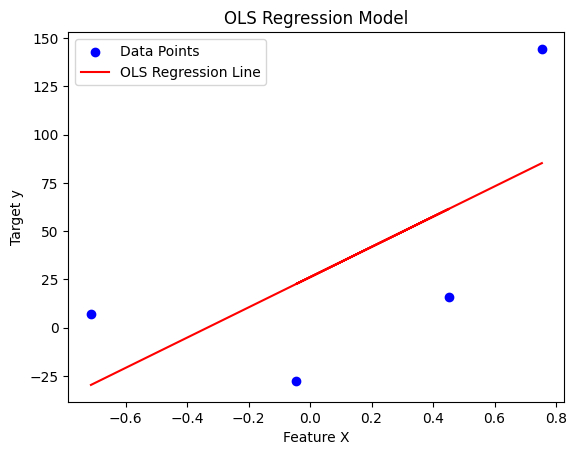

In [6]:
# Plot OLS Regression Line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='OLS Regression Line')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("OLS Regression Model")
plt.legend()
plt.show()

In [7]:
# 3. Implementing Gradient Descent with Constant Slope Assumption
m = 78.35  # Assumed slope
b = 0       # Initial intercept

In [8]:
# Computing initial predictions
y_pred = (m * X + b).reshape(4)

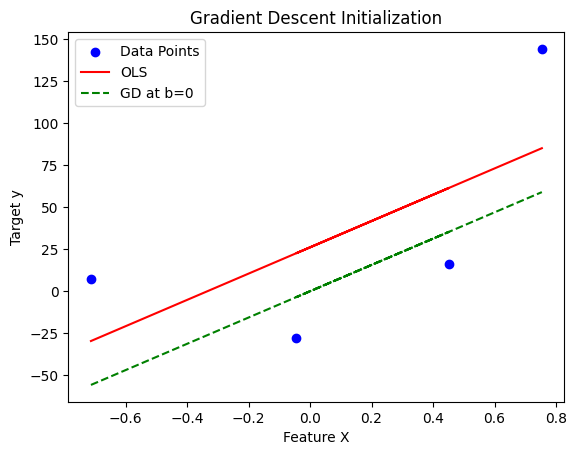

In [9]:
# Visualizing the initial gradient descent assumption
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='green', linestyle='dashed', label='GD at b=0')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Gradient Descent Initialization")
plt.legend()
plt.show()

In [10]:
# 4. Gradient Descent Iterations
lr = 0.1  # Learning rate
num_iterations = 100

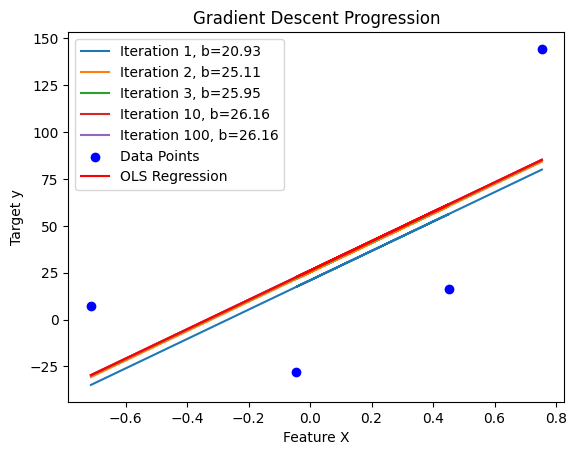

In [11]:
for i in range(num_iterations):
    loss_slope = -2 * np.sum(y - m * X.ravel() - b)
    step_size = loss_slope * lr
    b = b - step_size

    if i in [0, 1, 2, 9, 99]:  # Plot specific iterations
        y_pred = m * X + b
        plt.plot(X, y_pred, label=f'Iteration {i+1}, b={round(b, 2)}')

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, reg.predict(X), color='red', label='OLS Regression')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Gradient Descent Progression")
plt.legend()
plt.show()

In [12]:
print(f"Final Estimated Intercept (b) after {num_iterations} iterations: {b}")

Final Estimated Intercept (b) after 100 iterations: 26.15970426026152


# Conclusion

Gradient Descent iteratively updates the intercept term and converges towards an optimal value. With a well-chosen learning rate and sufficient epochs, gradient descent closely matches the OLS solution. However, choosing an inappropriate learning rate can lead to slow convergence or divergence.